In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyreport import PlotUtil
from hermes.postprocessing import *

%matplotlib qt
%load_ext autoreload

%autoreload 2

In [2]:
columns = ['strand_name', 'tof',
           'r_a_x', 'r_a_y', 'r_a_z',
           'v_a_x', 'v_a_y', 'v_a_z',
           'r_b_x', 'r_b_y', 'r_b_z',
           'd',
           'r_ab_sff_x', 'r_ab_sff_y', 'r_ab_sff_z']

file_path = "example_data.h5"

row_limit = -1

store_500km = pd.HDFStore(file_path)
instances_500km_df = store_500km.select('contact_instances', 'columns = %s' % str(columns), stop = row_limit)

# Sort by pass id
instances_500km_df = instances_500km_df.sort_index(0)

N_passes = 20

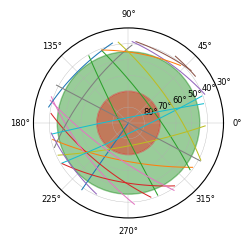

In [3]:
fig = plt.figure(figsize=(2.4, 2.4))
ax = plt.subplot(1,1,1, projection='polar')

def xyz_to_shperical(xyz):
    xy = xyz[:,0]**2 + xyz[:,1]**2
    r = np.sqrt(xy + xyz[:,2]**2)
    theta = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    phi = np.arctan2(xyz[:,1], xyz[:,0])
    return r, theta, phi

for i, pass_df in instances_500km_df.loc[0:N_passes,:].groupby(level=0):
    r_ab_sff = get_r_ab_sff(pass_df) / 1000
    r, theta, phi = xyz_to_shperical(r_ab_sff)
    line, = plt.polar(phi, theta * 180 / np.pi, linewidth=0.750)

plt.yticks(ticks=plt.yticks()[0], labels=["%d°" % v for v in 90 - np.array(plt.yticks()[0])])
#plt.grid()
thetaticks = np.arange(0,360,45)
ax.tick_params('x', pad = -0.75)
circle = plt.Circle((0.0, 0.0), 45, transform=ax.transData._b, color="green", alpha=0.4)
ax.add_artist(circle)
circle = plt.Circle((0.0, 0.0), 20, transform=ax.transData._b, color="red", alpha=0.4)
ax.add_artist(circle)

PlotUtil.apply_report_formatting()

ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)

plt.tight_layout(pad=0.5, rect=(0,0,1.05,1.0))
ax.grid(True, 'both', linewidth=0.25)

# plt.subplots_adjust(bottom=0.1)
plt.savefig('D:/git/thesis_report_ae/figures/skyplot_visibility.pdf')

fig


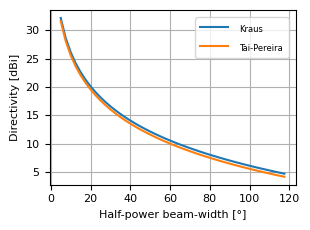

In [4]:
def kraus(hpbw_deg):
    return 4*np.pi / np.deg2rad(hpbw_deg)**2

hpbw = np.arange(5, 120, 2.5)

D_kraus = kraus(hpbw)
D_chento = 32 * np.log(2) / (2*np.deg2rad(hpbw)**2)

fig, ax = plt.subplots(1,1)
ax.plot(hpbw, 10*np.log10(D_kraus), label='Kraus')
ax.plot(hpbw, 10*np.log10(D_chento), label='Tai-Pereira')
ax.legend()
ax.grid()
ax.set_ylabel('Directivity [dBi]')
ax.set_xlabel('Half-power beam-width [°]')

PlotUtil.apply_report_formatting()
plt.tight_layout()
plt.savefig('D:/git/thesis_report_ae/figures/beam_width_approximation.pdf')
fig

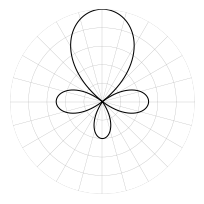

In [5]:
theta = np.arange(-180, 180, 0.25)
n = 15
#U = (np.cos(np.deg2rad(theta))**n) / np.deg2rad(theta)
U = np.cos(np.deg2rad(theta))**n
U[theta > 90.] = 1e-9
U[theta < -90.] = 1e-9

fig = plt.figure(figsize=(2.4, 2.4))
ax = plt.subplot(1,1,1, projection='polar')

quadrant = (np.pi/2, np.pi, 3*np.pi/2, np.pi)
line, = plt.polar(np.deg2rad(theta) + np.pi/2,      10*np.log10(abs(U)),        color='black', linewidth=0.750)
line, = plt.polar(np.deg2rad(theta) + np.pi,        10*np.log10(abs(U)) - 15,   color='black', linewidth=0.750)
line, = plt.polar(np.deg2rad(theta) + 3*np.pi/2,    10*np.log10(abs(U)) - 18,   color='black', linewidth=0.750)
line, = plt.polar(np.deg2rad(theta),                10*np.log10(abs(U)) - 15,   color='black', linewidth=0.750)

ax.set_ylim((-30, 0))
#ax.set_axis_off()
ax.spines['polar'].set_visible(False)
ax.get_xaxis().set_ticklabels([])
ax.get_xaxis().set_ticks(np.deg2rad(np.arange(0, 360, 15)))

ax.get_yaxis().set_ticklabels([])
ax.get_yaxis().set_ticks(np.arange(-30, 3, 6))

ax.grid(True, linewidth=0.2)
plt.savefig('D:/git/thesis_report_ae/figures/beam_width.svg')

pass
fig
#

In [6]:
plt.close('all')

In [7]:
def kraus_dB(hpbw_deg):
    return 10*np.log10(kraus(hpbw_deg))

kraus_dB(2*(90-38))

5.8138845024288